In [1]:
import numpy as np
import torch

from lcmr.grammar import Appearance, Layer, Object, Scene
from lcmr.grammar.transformations import Affine, LazyAffine
from lcmr.renderer.renderer2d import OpenGLRenderer2D
from lcmr.utils.presentation import display_img

In [2]:
scene = Scene(
    batch_size=[3],
    layer=Layer(
        batch_size=[3, 2],
        object=Object(
            batch_size=[3, 2, 4],
            objectShape=torch.ones(3, 2, 4, 1, dtype=torch.uint8),
            #transformation=Affine(batch_size=[3, 2, 4], matrix=torch.ones(3, 2, 4, 3, 3)),
            transformation=LazyAffine.from_tensors(translation=torch.ones(3, 2, 4, 2), scale=torch.ones(3, 2, 4, 2), angle=torch.ones(3, 2, 4, 1)),
            appearance=Appearance(batch_size=[3, 2, 4], confidence=torch.ones(3, 2, 4, 1), color=torch.ones(3, 2, 4, 3)),
        ),
        scale=torch.ones(3, 2, 1),
        composition=torch.ones(3, 2, 1, dtype=torch.uint8),
    ),
)


scene

Scene(
    layer=Layer(
        composition=Tensor(shape=torch.Size([3, 2, 1]), device=cpu, dtype=torch.uint8, is_shared=False),
        object=Object(
            appearance=Appearance(
                color=Tensor(shape=torch.Size([3, 2, 4, 3]), device=cpu, dtype=torch.float32, is_shared=False),
                confidence=Tensor(shape=torch.Size([3, 2, 4, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                batch_size=torch.Size([3, 2, 4]),
                device=None,
                is_shared=False),
            objectShape=Tensor(shape=torch.Size([3, 2, 4, 1]), device=cpu, dtype=torch.uint8, is_shared=False),
            transformation=LazyAffine(
                angle=Tensor(shape=torch.Size([3, 2, 4, 1]), device=cpu, dtype=torch.float32, is_shared=False),
                scale=Tensor(shape=torch.Size([3, 2, 4, 2]), device=cpu, dtype=torch.float32, is_shared=False),
                translation=Tensor(shape=torch.Size([3, 2, 4, 2]), device=cpu, dtype=torch.float

In [3]:
from kornia.geometry.transform import get_affine_matrix2d


def create_scene(batch_len: int, layer_len: int, object_len: int, translation=None, scale=None, angle=None, color=None, confidence=None) -> Scene:
    total_objects = batch_len * layer_len * object_len

    if translation == None:
        translation = torch.rand(total_objects, 2)
    if scale == None:
        scale = torch.rand(total_objects, 2)
    if angle == None:
        angle = torch.rand(total_objects, 1)
    if color == None:
        color = torch.rand(total_objects, 3)
    color = color.reshape(batch_len, layer_len, object_len, 3)
    if confidence == None:
        confidence = torch.rand(total_objects, 1)
    confidence = confidence.reshape(batch_len, layer_len, object_len, 1)

    center = torch.zeros(total_objects, 2)
    transformation = get_affine_matrix2d(translation, center, scale, angle.reshape(-1) * 360).reshape(batch_len, layer_len, object_len, 3, 3)

    scene = Scene(
        batch_size=[batch_len],
        layer=Layer(
            batch_size=[batch_len, layer_len],
            object=Object(
                batch_size=[batch_len, layer_len, object_len],
                objectShape=torch.ones(batch_len, layer_len, object_len, 1, dtype=torch.uint8),
                transformation=Affine(batch_size=[batch_len, layer_len, object_len], matrix=transformation),
                appearance=Appearance(batch_size=[batch_len, layer_len, object_len], confidence=confidence, color=color),
            ),
            scale=torch.ones(batch_len, layer_len, 1),
            composition=torch.ones(batch_len, layer_len, 1, dtype=torch.uint8),
        ),
    )

    return scene

In [4]:
renderer = OpenGLRenderer2D((200, 200))

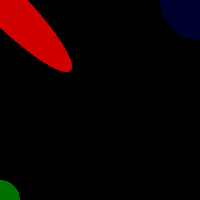

In [5]:
translation = torch.tensor([[0, 0.], [0, 1], [1, 0]], dtype=torch.float32)[None, None, ...]
color = torch.tensor([[0.9, 0, 0], [0, 0.9, 0], [0, 0, 0.9]], dtype=torch.float32)[None, None, ...]
scale = torch.tensor([[0.1, 0.5], [0.1, 0.1], [0.2, 0.2]])[None, None, ...]
confidence = torch.tensor([[0.9], [0.5], [0.2]])[None, None, ...]
angle = torch.tensor([[-np.pi/4], [0], [0]], dtype=torch.float32)[None, None, ...]
scene = Scene.from_tensors_sparse(translation=translation, scale=scale, color=color, confidence=confidence, angle=angle)

display_img(renderer.render(scene).image_rgb[0])